In [32]:
#step function
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

#step function new
def step_function(x):       # xを指定
    y = x > 0               # True or False
    return y.astype(np.int) # ブーリアン型からint型へ変換

In [33]:
## numpyで要素出力
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [34]:
## ブーリアンの配列での生成
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [35]:
## ブーリアン型からint型へ変換
y = y.astype(np.int)
y

array([0, 1, 1])

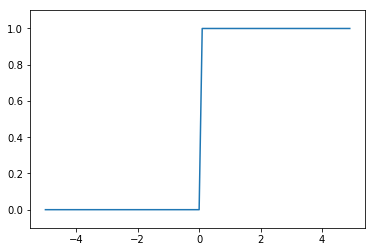

In [36]:
#graph of step function
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y軸の範囲を指定
plt.show()

In [37]:
#sigmoid gunction ex
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [38]:
#sigmoid gunction ex2
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
1.0 / t

[ 2.  3.  4.]


array([ 1.        ,  0.5       ,  0.33333333])

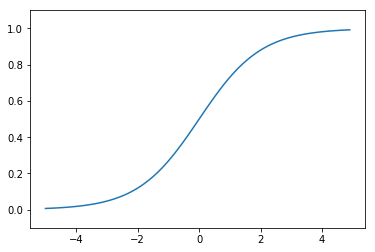

In [39]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y軸の範囲を指定
plt.show()

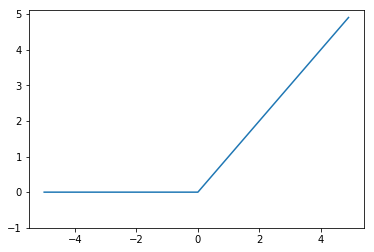

In [40]:
# ReLU function
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.1) #y軸の範囲を指定
plt.show()

In [41]:
#3.3
# single-dimensional array
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [42]:
# two-dimensional array
B = np.array([[1,2], [3,4], [5,6]]) #([[1行目], [2行目], [3行目]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [43]:
# matrix product calculation
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
np.dot(A, B) #AとBの行列の積

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [44]:
# matrix product calculation
# 2*3 matrix, 3*2 matrix
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
np.dot(A, B) #AとBの行列の積

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [45]:
# matrix product calculation
# 2*2 matrix, 3*2 matrix
A = np.array([[1,2], [5,6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
np.dot(A, B) #AとBの行列の積, error

(2, 2)
(3, 2)


ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [46]:
#3.3.3
#neural network matrix product
X = np.array([1, 2]) #[x1, x2]
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]]) #[[w11,w21,w31], [w12,w22,w32]]
print(W)
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


In [47]:
# 3.4.2
# inplementation

#1層目
X1 = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) #(2,3)
print(X.shape)  #(2,)
print(B1.shape) #(3,)

A1 = np.dot(X1, W1) + B1
Z1 = sigmoid(A1) #活性化関数 h(): a1→z1

print(A1) #[0.3, 0.7, 1.1]
print(Z1) #[ 0.57444252  0.66818777  0.75026011]

#2層目
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) #(3,)
print(W2.shape) #(3, 2)
print(B2.shape) #(2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

#3層目(final)
def identity_function(x): #恒等関数σ (出力層の活性化関数) ≠シグモイド関数
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) #もしくは Y =A3

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]
(3,)
(3, 2)
(2,)


In [48]:
#3.4.3
#inplementation summary
#重みWのみ大文字にする
def init_network(): #重みとバイアスの初期化を行い、変数networkに格納
    network = {}
# network下に値を放り込んでいく
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1,0.2])

    return network

def forward(network, x): #入力から出力方向への伝達処理
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1  #a1作成
    z1 = sigmoid(a1)         #a1 → z1
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3) #恒等関数
    
    return y

network = init_network() #W,bを決定する
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # 出力値 [ 0.31682708  0.69627909]

[ 0.31682708  0.69627909]


In [49]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]


In [50]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [51]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a))) #ソフトマックス関数の計算
                                     #[ nan  nan  nan]

c = np.max(a) #1010
print(a - c)  #[  0 -10 -20]

print(np.exp(a - c) / np.sum(np.exp(a-c)))
                                #[  9.99954600e-01   4.53978686e-05   2.06106005e-09]

[ nan  nan  nan]
[  0 -10 -20]
[  9.99954600e-01   4.53978686e-05   2.06106005e-09]


C:\Users\NEC-PCuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\NEC-PCuser\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [52]:
#オーバーフロー対策をしたソフトマックス関数
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) #オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [53]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[ 0.01821127  0.24519181  0.73659691]


1.0

In [56]:
#3.6.1 MNIST dataset
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist # dataset/mnist.pyのload_mnist関数のimport

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# (訓練画像, 訓練ラベル), (テスト画像, テストラベル)
# normalize ... 入力画像のピクセルを規格化するかどうか
# flatten ... 入力画像を1次元配列にするかどうか
# one_hot_label ... ラベルをone-hot表現にするかどうか

# それぞれのデータの形状を出力
print(x_train.shape) #(60000, 784)
print(t_train.shape) #(60000,)
print(x_test.shape)  #(10000, 784)
print(t_test.shape)  #(10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [58]:
#show MNIST image

import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img)) #Numpyとして格納された画像データを、PILのデータオブジェクトに変換
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
print(label) #5

print(img.shape)          #(784,)
img = img.reshape(28, 28) #形状を元の画像サイズに変形
print(img.shape)          #(28, 28)

img_show(img)

5
(784,)
(28, 28)


In [70]:
# ニューラルネットワークの推論処理

import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def get_data(): #データを得る
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f) #pickleには重みとバイアスのパラメータがディクショナリ型の変数として保存されている
        
    return network

def predict(network, x): 
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [71]:
x, t = get_data() #データセットを取得
network = init_network() #ネットワークを生成

accuracy_cnt = 0
for i in range(len(x)): #xに格納された画像データを1枚ずつfor文で取り出し、predict()関数によって分類
    y = predict(network, x[i])
    p = np.argmax(y) #最も確率の高い要素のインデックスを取得
    if p == t[i]: #if 正解のとき
        accuracy_cnt += 1 

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) #認識制度

Accuracy:0.9352


In [74]:
# 3.6.3 バッチ処理

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [76]:
# バッチ処理による実装
# バッチ：束

x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" +str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [77]:
#range(start, end, step)
list( range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [78]:
#range(start, end, step)
list( range(0, 10, 3))

[0, 3, 6, 9]

In [79]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [81]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3